In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#### SOURCE from https://www.kaggle.com/datasets/ericpierce/austinhousingprices
dataset_path = os.path.join('../datasets/austin_housing/')
file_name = 'austin_housing_data.csv'
df = pd.read_csv(dataset_path+file_name)

In [3]:
g = df.columns.to_series().groupby(df.dtypes).groups
g

{bool: ['hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView'], int64: ['zpid', 'zipcode', 'garageSpaces', 'parkingSpaces', 'yearBuilt', 'numPriceChanges', 'latest_salemonth', 'latest_saleyear', 'numOfPhotos', 'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures', 'numOfWaterfrontFeatures', 'numOfWindowFeatures', 'numOfCommunityFeatures', 'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBedrooms', 'numOfStories'], float64: ['latitude', 'longitude', 'propertyTaxRate', 'latestPrice', 'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating', 'numOfBathrooms'], object: ['city', 'streetAddress', 'description', 'homeType', 'latest_saledate', 'latestPriceSource', 'homeImage']}

In [4]:
df.shape

(15171, 47)

In [5]:
# Here we can see the amount of unique values per column, it is important to see that some are unique, so we can drop them as they will 
# add nothing special to the feature ranking methods
df.nunique().sort_values(ascending = False)

zpid                          15171
homeImage                     15171
streetAddress                 15164
description                   15133
latitude                      14410
longitude                     12480
livingAreaSqFt                 3650
latestPrice                    2365
lotSizeSqFt                    1426
latest_saledate                 958
avgSchoolDistance               362
latestPriceSource               225
avgSchoolSize                   160
numOfPhotos                     151
yearBuilt                       115
zipcode                          48
avgSchoolRating                  27
numPriceChanges                  22
numOfBathrooms                   22
garageSpaces                     14
parkingSpaces                    14
numOfAppliances                  13
latest_salemonth                 12
numOfBedrooms                    11
MedianStudentsPerTeacher         10
homeType                         10
numOfCommunityFeatures            9
city                        

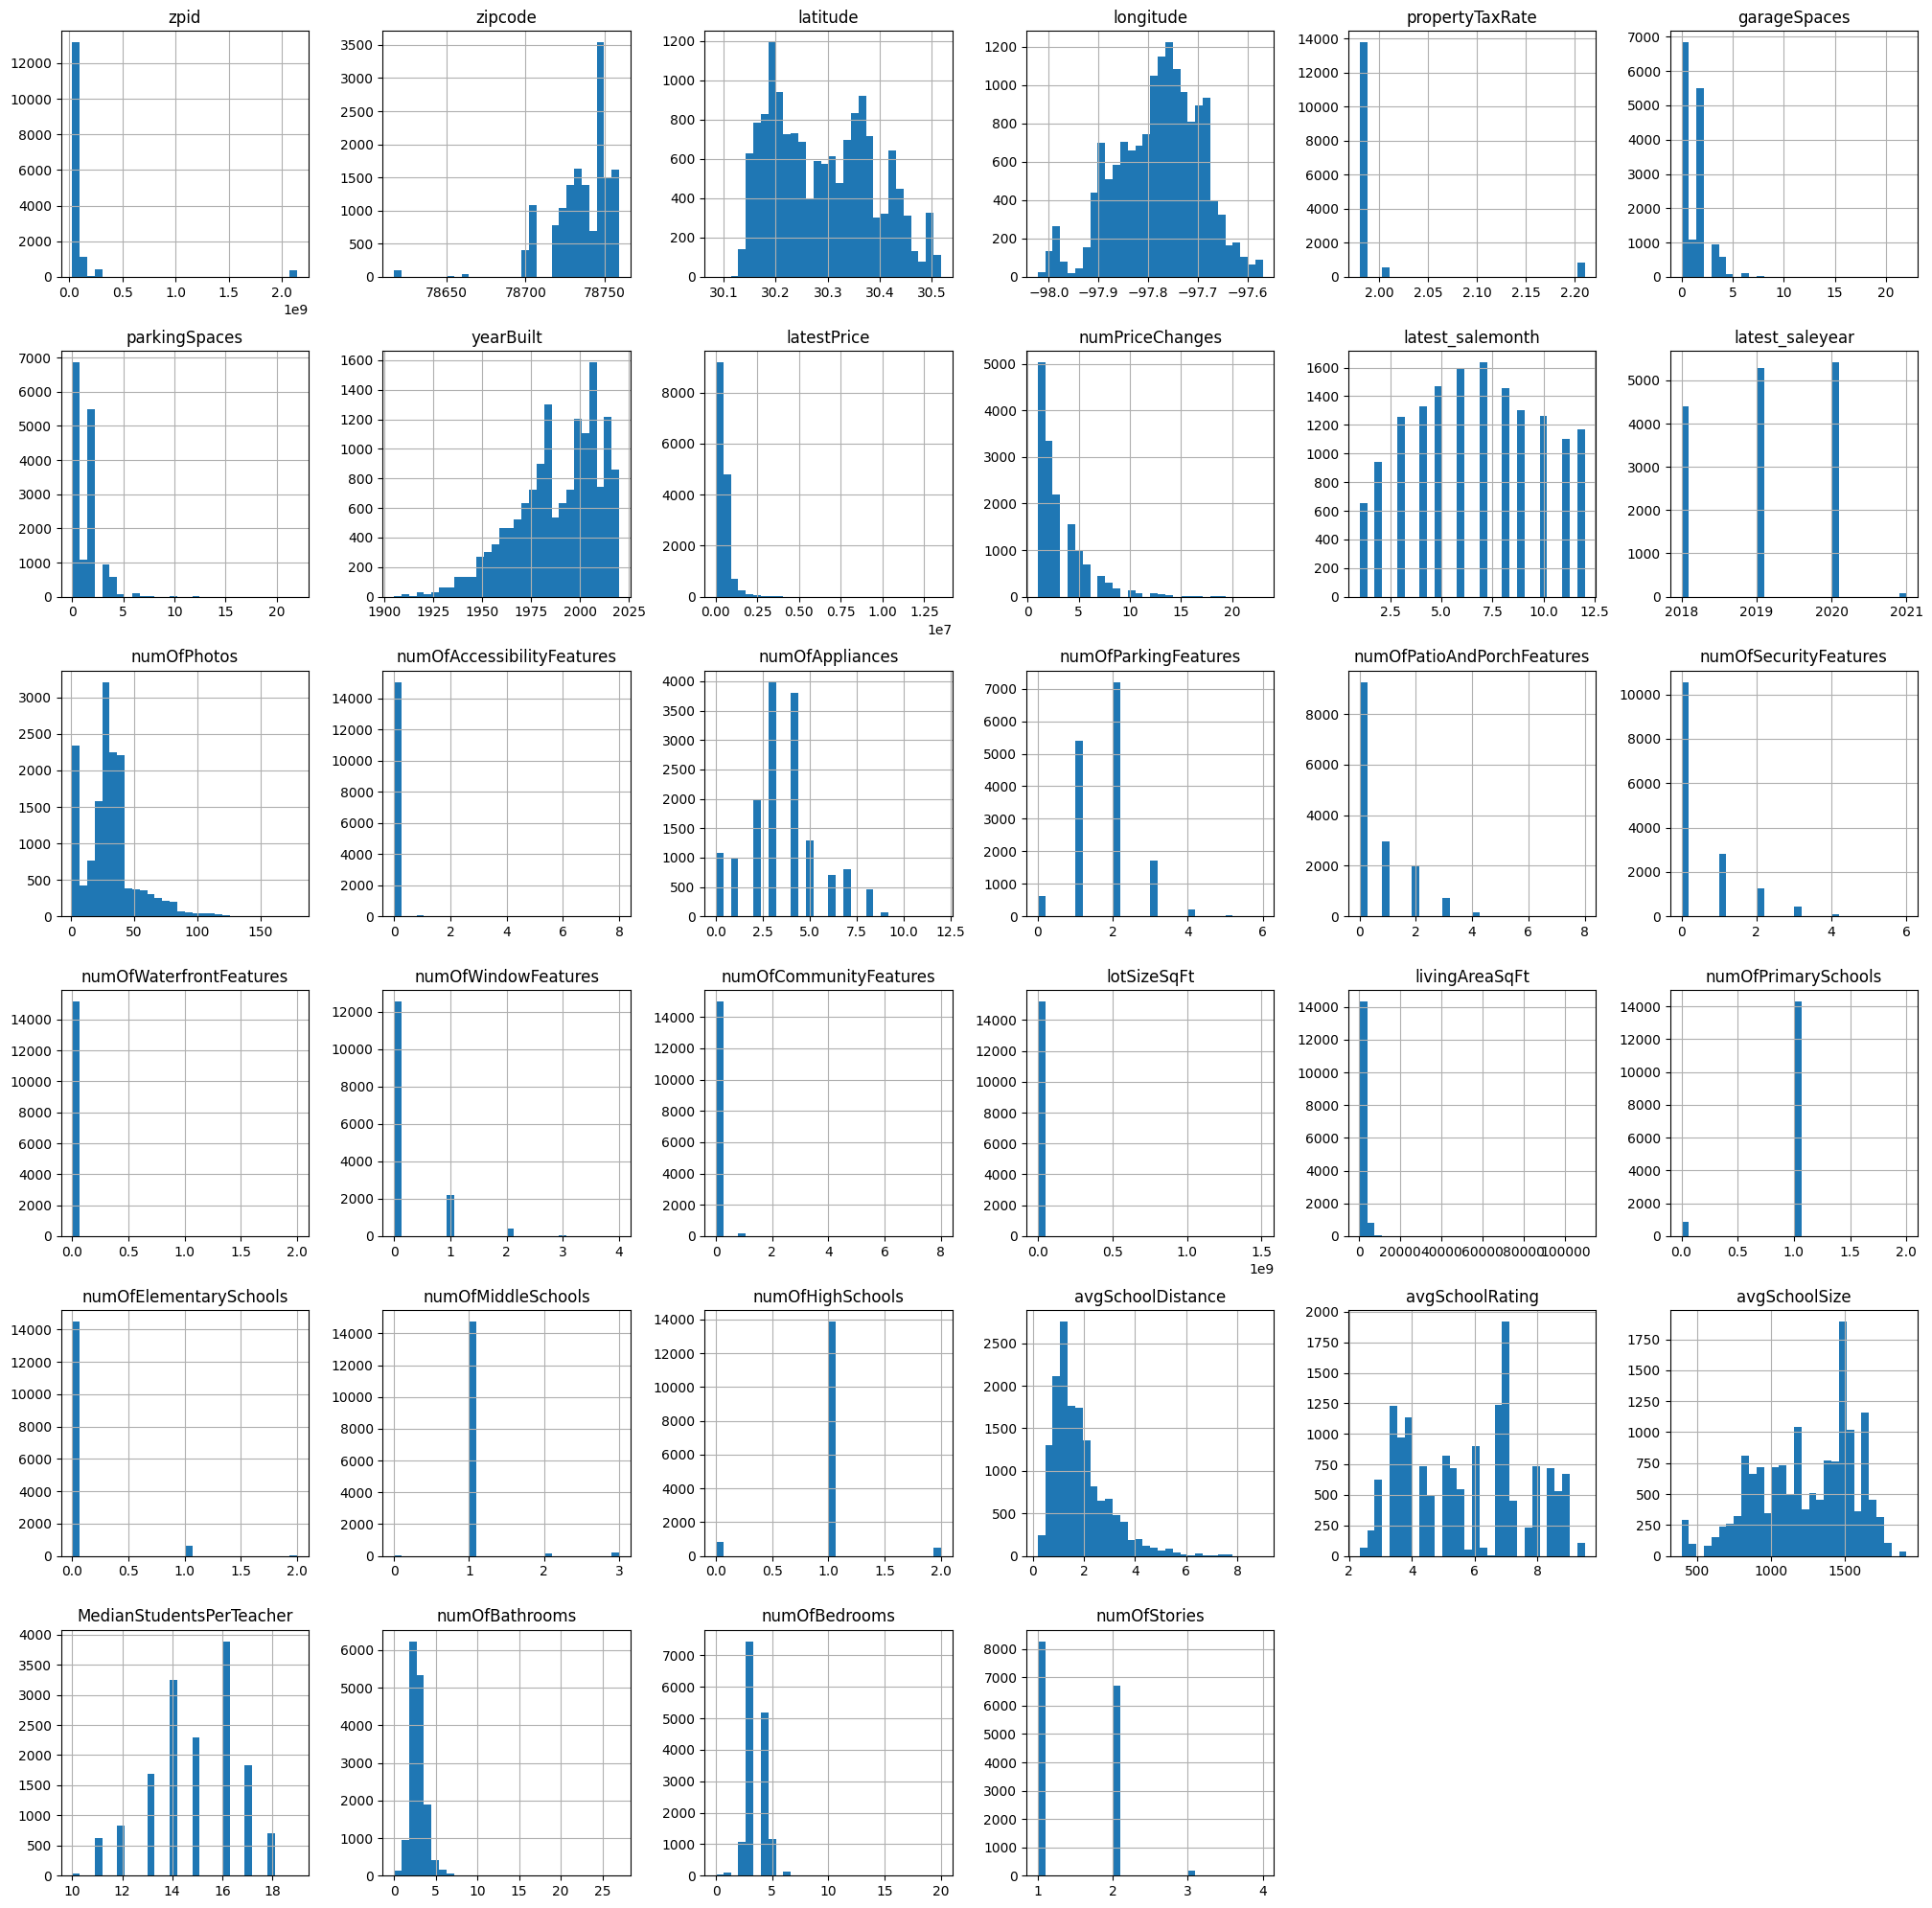

In [6]:
# Here we can see it more clearly, features such as numOfAccessibilityFeatures, numOfWaterfrontFeatures, numOfCommunityFeatures, numOfPrimarySchools, numOfElementarySchools, numOfMiddleSchools, numOfHighSchools
df.hist(bins=30, figsize=(25,25))
plt.show()


####### Use the features below if we want to see the specific amounts per features. 
#df['numOfAccessibilityFeatures'].value_counts()
#df['numOfWaterfrontFeatures'].value_counts()
#df['numOfPrimarySchools'].value_counts()
#df['numOfElementarySchools'].value_counts()
# etc...


In [7]:
# We drop zpid and street address because they are mostly unique values. The rest we drop because they are not relevant to our main aim.

clean_df = df.drop(['zpid', 'streetAddress', 'description', 'homeImage', 'latest_saledate', 'latestPriceSource',
              'latest_salemonth', 'latest_saleyear', 'numOfPhotos', 'numOfAccessibilityFeatures',  'numOfWaterfrontFeatures',
              'numOfCommunityFeatures', 'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools', 'numOfHighSchools'], axis = 1)
clean_df.head()


,city,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,numOfWindowFeatures,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,pflugerville,78660,30.430632,-97.663078,1.98,2,True,True,True,True,...,1,6011.0,2601.0,1.266667,2.666667,1063,14,3.0,4,2
1,pflugerville,78660,30.432673,-97.661697,1.98,2,True,True,True,True,...,0,6185.0,1768.0,1.400000,2.666667,1063,14,2.0,4,1
2,pflugerville,78660,30.409748,-97.639771,1.98,0,True,True,False,True,...,0,7840.0,1478.0,1.200000,3.000000,1108,14,2.0,3,1
3,pflugerville,78660,30.432112,-97.661659,1.98,2,True,True,True,True,...,0,6098.0,1678.0,1.400000,2.666667,1063,14,2.0,3,1
4,pflugerville,78660,30.437368,-97.656860,1.98,0,True,True,False,True,...,0,6708.0,2132.0,1.133333,4.000000,1223,14,3.0,3,2


### One Hot Encoding

Our features are not ranked, so it is better to use one hot encoding

In [10]:
categorical_cols = ['city', 'homeType', 'hasAssociation', 'hasCooling', 'hasGarage',
                                    'hasHeating', 'hasSpa', 'hasView']


clean_df = pd.get_dummies(clean_df, columns = categorical_cols)
clean_df  

,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,numOfAppliances,...,hasCooling_False,hasCooling_True,hasGarage_False,hasGarage_True,hasHeating_False,hasHeating_True,hasSpa_False,hasSpa_True,hasView_False,hasView_True
0,78660,30.430632,-97.663078,1.98,2,2,2012,305000.0,5,5,...,0,1,0,1,0,1,1,0,1,0
1,78660,30.432673,-97.661697,1.98,2,2,2013,295000.0,1,1,...,0,1,0,1,0,1,1,0,1,0
2,78660,30.409748,-97.639771,1.98,0,0,2018,256125.0,1,4,...,0,1,1,0,0,1,1,0,1,0
3,78660,30.432112,-97.661659,1.98,2,2,2013,240000.0,4,0,...,0,1,0,1,0,1,1,0,1,0
4,78660,30.437368,-97.656860,1.98,0,0,2002,239900.0,3,0,...,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,78748,30.161997,-97.816345,1.98,6,6,1986,330000.0,1,3,...,0,1,0,1,0,1,1,0,0,1
15167,78741,30.240223,-97.772835,1.98,2,2,2016,550000.0,1,5,...,0,1,0,1,0,1,0,1,0,1
15168,78704,30.244835,-97.761124,1.98,2,2,1936,875000.0,7,3,...,0,1,0,1,0,1,1,0,1,0
15169,78722,30.281569,-97.717789,1.98,0,0,1968,420000.0,5,3,...,0,1,1,0,0,1,1,0,1,0


### Label Encoding

Use label encoding as one hot can cause a higher curse of dimensionaloty. 1 stands for True and 0 for False in the features which were previously boolean ('hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView'). City and homeType are also encoded. However, this can cause features encoded to have a ranking where they previosuly had none, which can affect our data. So preferably stay with One-Hot encoding 

In [ ]:
'''
le = preprocessing.LabelEncoder()

df_columns = [clean_df.city, clean_df.homeType, clean_df.hasAssociation, clean_df.hasCooling, clean_df.hasGarage,
             clean_df.hasHeating, clean_df.hasSpa, clean_df.hasView]
for i in df_columns:
    i = le.fit_transform(i)

clean_df.city = le.fit_transform(clean_df.city)
clean_df.homeType = le.fit_transform(clean_df.homeType)
clean_df.hasAssociation = le.fit_transform(clean_df.hasAssociation)
clean_df.hasCooling = le.fit_transform(clean_df.hasCooling)
clean_df.hasGarage = le.fit_transform(clean_df.hasGarage)
clean_df.hasHeating = le.fit_transform(clean_df.hasHeating)
clean_df.hasSpa = le.fit_transform(clean_df.hasSpa)
clean_df.hasView = le.fit_transform(clean_df.hasView)


print('the set has {} rows and {} columns'.format(clean_df.shape[0], clean_df.shape[1]))
clean_df
'''

the set has 15171 rows and 31 columns


,city,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,numOfWindowFeatures,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,6,78660,30.430632,-97.663078,1.98,2,1,1,1,1,...,1,6011.0,2601.0,1.266667,2.666667,1063,14,3.0,4,2
1,6,78660,30.432673,-97.661697,1.98,2,1,1,1,1,...,0,6185.0,1768.0,1.400000,2.666667,1063,14,2.0,4,1
2,6,78660,30.409748,-97.639771,1.98,0,1,1,0,1,...,0,7840.0,1478.0,1.200000,3.000000,1108,14,2.0,3,1
3,6,78660,30.432112,-97.661659,1.98,2,1,1,1,1,...,0,6098.0,1678.0,1.400000,2.666667,1063,14,2.0,3,1
4,6,78660,30.437368,-97.656860,1.98,0,1,1,0,1,...,0,6708.0,2132.0,1.133333,4.000000,1223,14,3.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,0,78748,30.161997,-97.816345,1.98,6,0,1,1,1,...,0,6534.0,1234.0,0.900000,3.333333,1424,14,2.0,3,1
15167,0,78741,30.240223,-97.772835,1.98,2,1,1,1,1,...,0,2439.0,1888.0,1.900000,6.666667,1226,16,4.0,3,3
15168,0,78704,30.244835,-97.761124,1.98,2,0,1,1,1,...,0,9408.0,1524.0,0.800000,5.000000,889,13,3.0,3,2
15169,0,78722,30.281569,-97.717789,1.98,0,0,1,0,1,...,0,6098.0,6068.0,1.300000,6.666667,1057,15,2.0,4,1


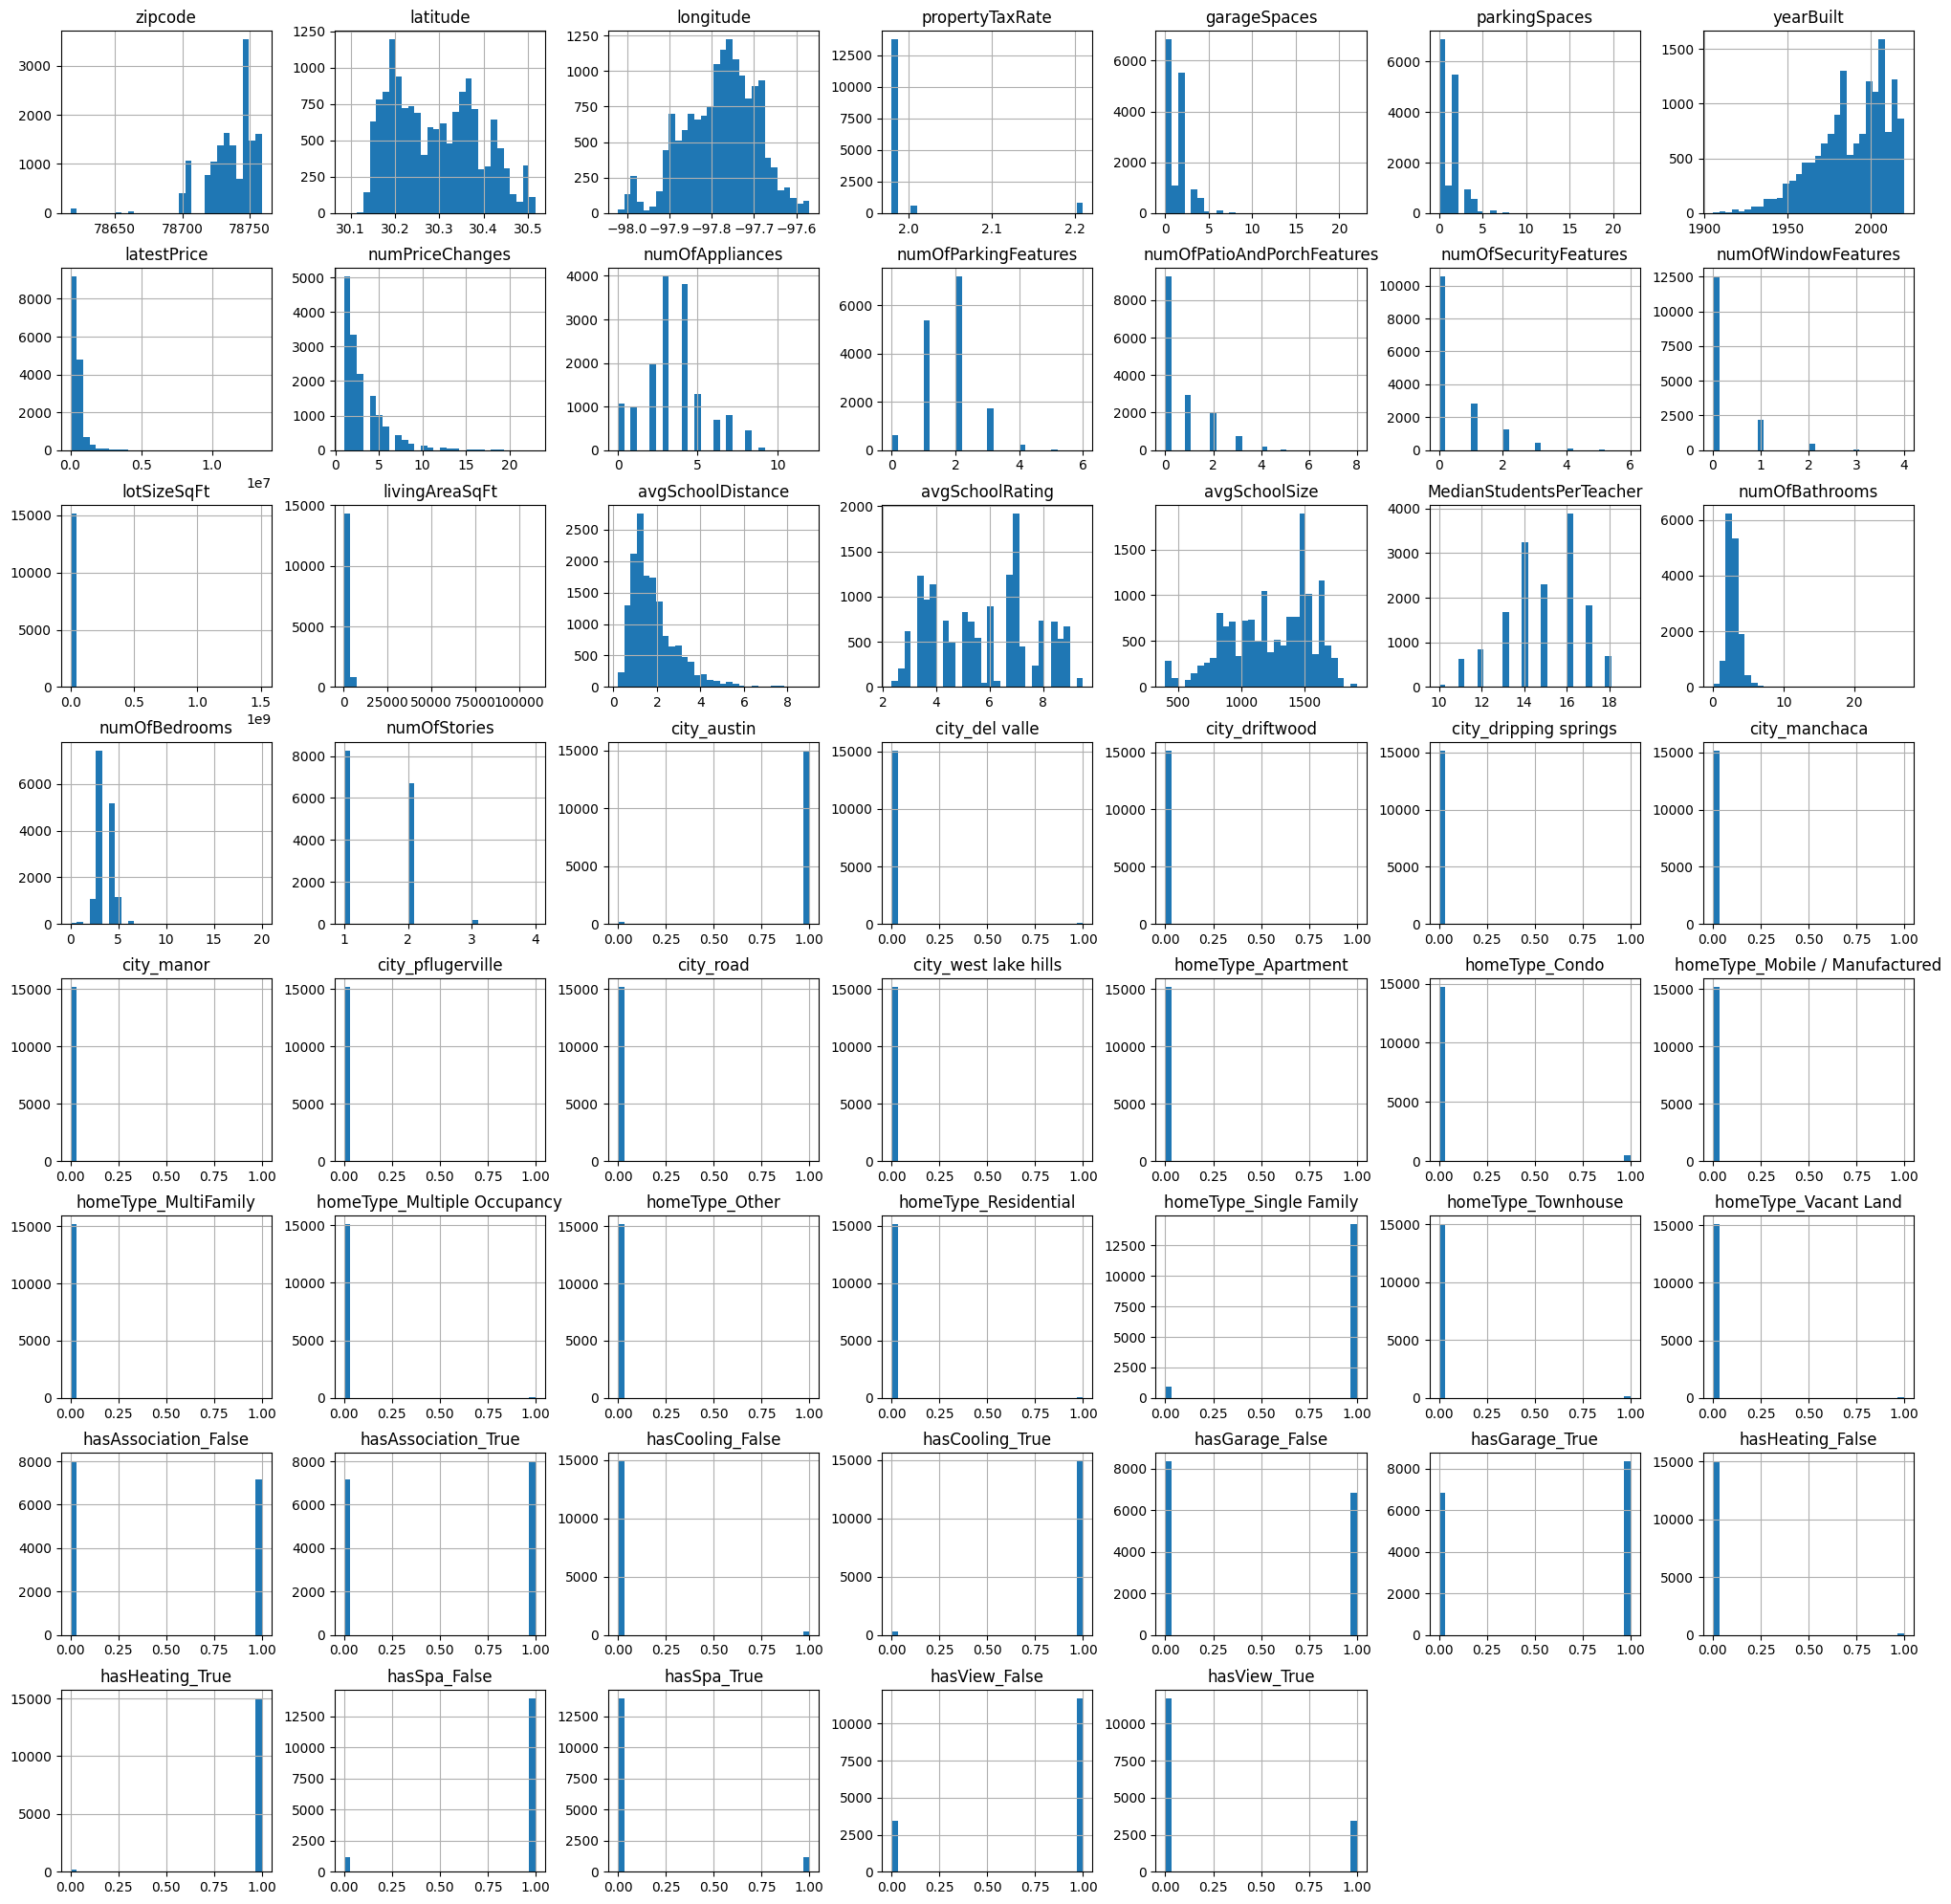

In [11]:
# If we uncomment the code below we will see the new dataset, encoded and cleaned. We can see that city, hasCooling and hasHeating should be dropped as 95% of the instances correspond to a shared feature.

####### Run this to see histograms of each variable
clean_df.hist(bins=30, figsize=(25,25))
plt.show()

####### Run this instead to see the amount of instances
#df['city'].value_counts()
#df['hasCooling'].value_counts()
#df['hasHeating'].value_counts()

In [11]:
clean_df = clean_df.drop(['city', 'hasCooling', 'hasHeating'], axis = 1)
clean_df.describe()


,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasGarage,hasSpa,hasView,homeType,...,numOfWindowFeatures,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,...,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,78735.932964,30.291596,-97.778532,1.994085,1.229187,0.527783,0.550129,0.079032,0.227737,6.789005,...,0.208490,1.190840e+05,2208.323314,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,18.893475,0.096973,0.084715,0.053102,1.352117,0.499244,0.497497,0.269798,0.419386,1.150323,...,0.488331,1.225272e+07,1378.576119,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000e+02,300.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,...,0.000000,6.534000e+03,1483.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1.000000,0.000000,0.000000,7.000000,...,0.000000,8.276000e+03,1975.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,78749.000000,30.366585,-97.717903,1.980000,2.000000,1.000000,1.000000,0.000000,0.000000,7.000000,...,0.000000,1.089000e+04,2687.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,78759.000000,30.517323,-97.569504,2.210000,22.000000,1.000000,1.000000,1.000000,1.000000,9.000000,...,4.000000,1.508483e+09,109292.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


### Outliers
As seen in the histograms and in the standard deviation shown in the table above, livingAreaSqFt and lotSizeSqFt have strange numbers, on closer inspection, we can see that they have some outliers

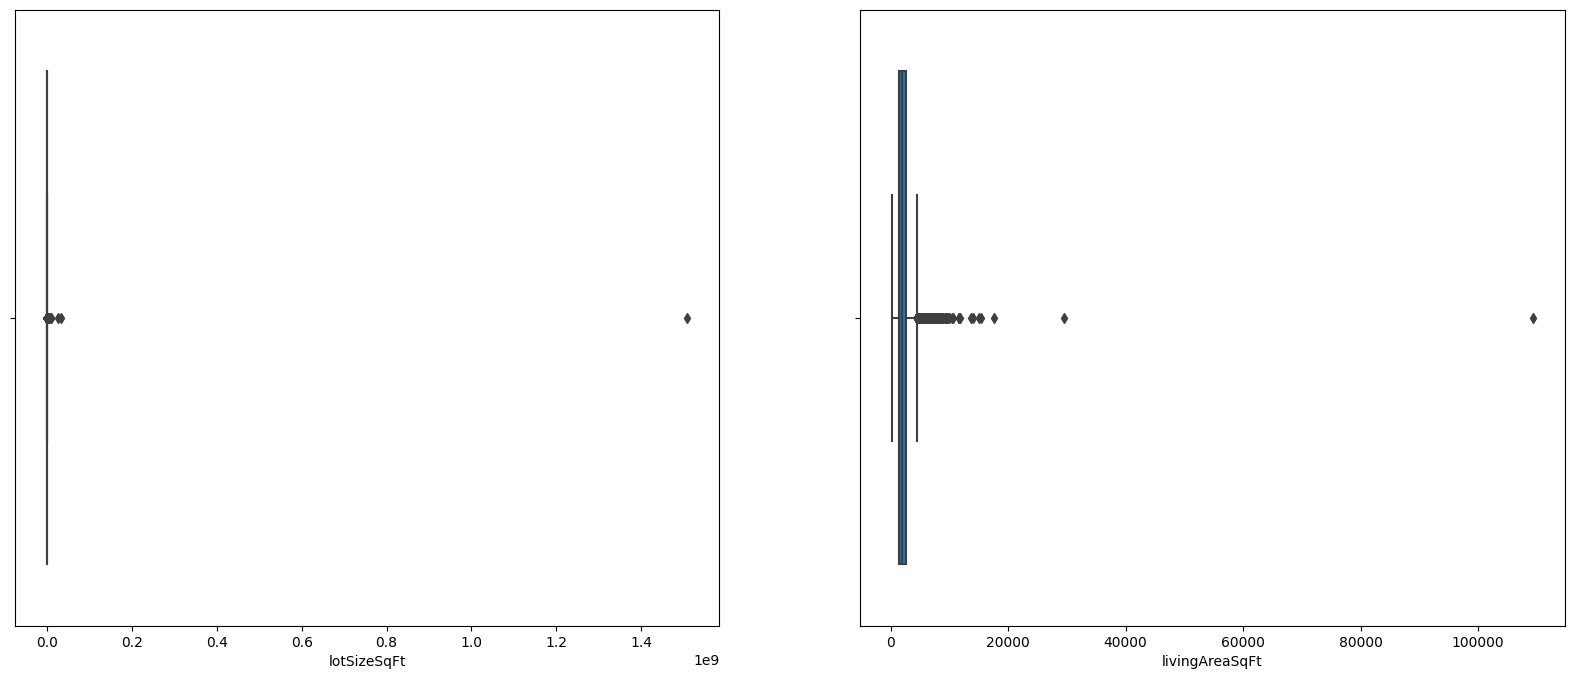

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

sns.boxplot(x=clean_df['lotSizeSqFt'], ax = ax1)
sns.boxplot(x=clean_df['livingAreaSqFt'], ax = ax2)
plt.show()


In [13]:
# Remove outliers
median = float(clean_df['lotSizeSqFt'].median())
clean_df["lotSizeSqFt"] = np.where(df["lotSizeSqFt"] > median, median, clean_df['lotSizeSqFt'])

median2 = float(clean_df['livingAreaSqFt'].median())
clean_df["livingAreaSqFt"] = np.where(df["livingAreaSqFt"] > median, median, clean_df['livingAreaSqFt'])


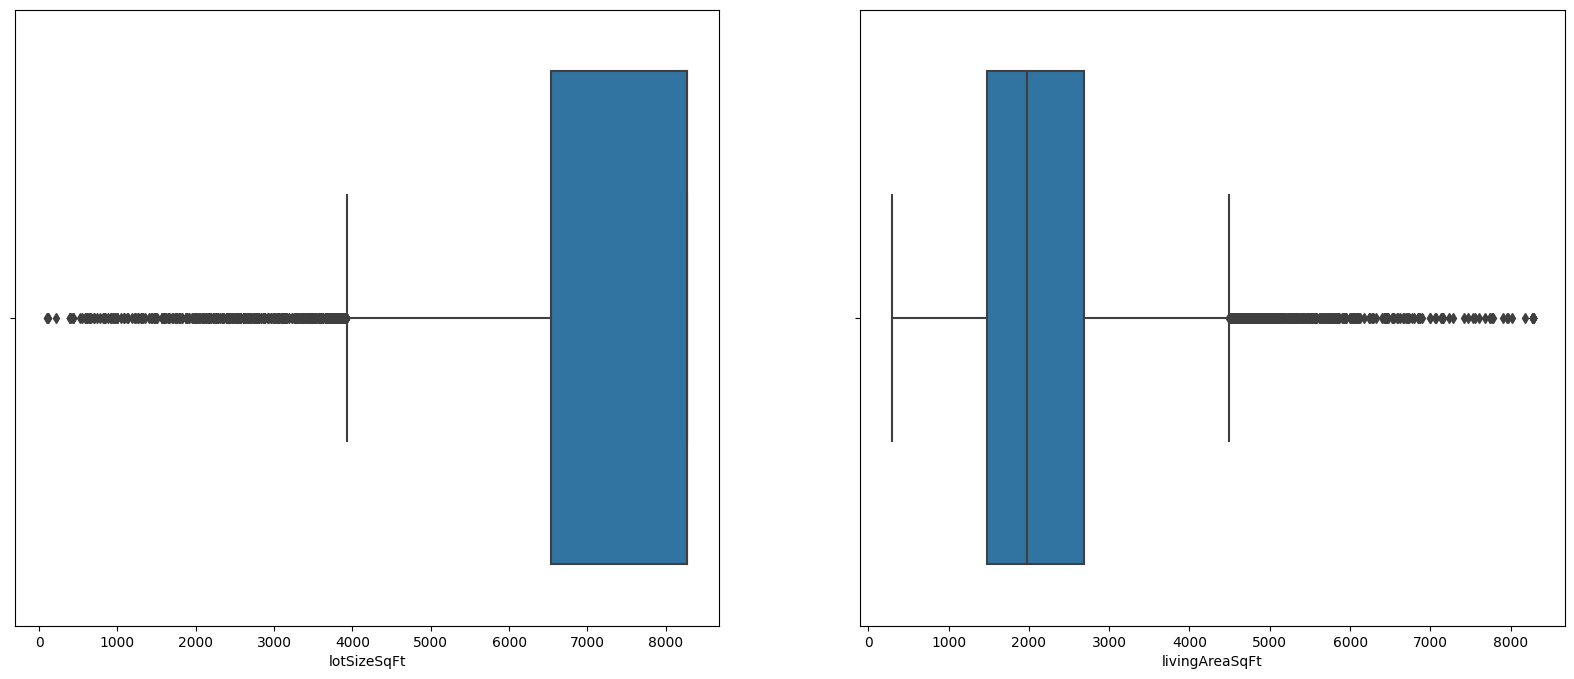

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

sns.boxplot(x=clean_df['lotSizeSqFt'], ax = ax1)
sns.boxplot(x=clean_df['livingAreaSqFt'], ax = ax2)
plt.show()

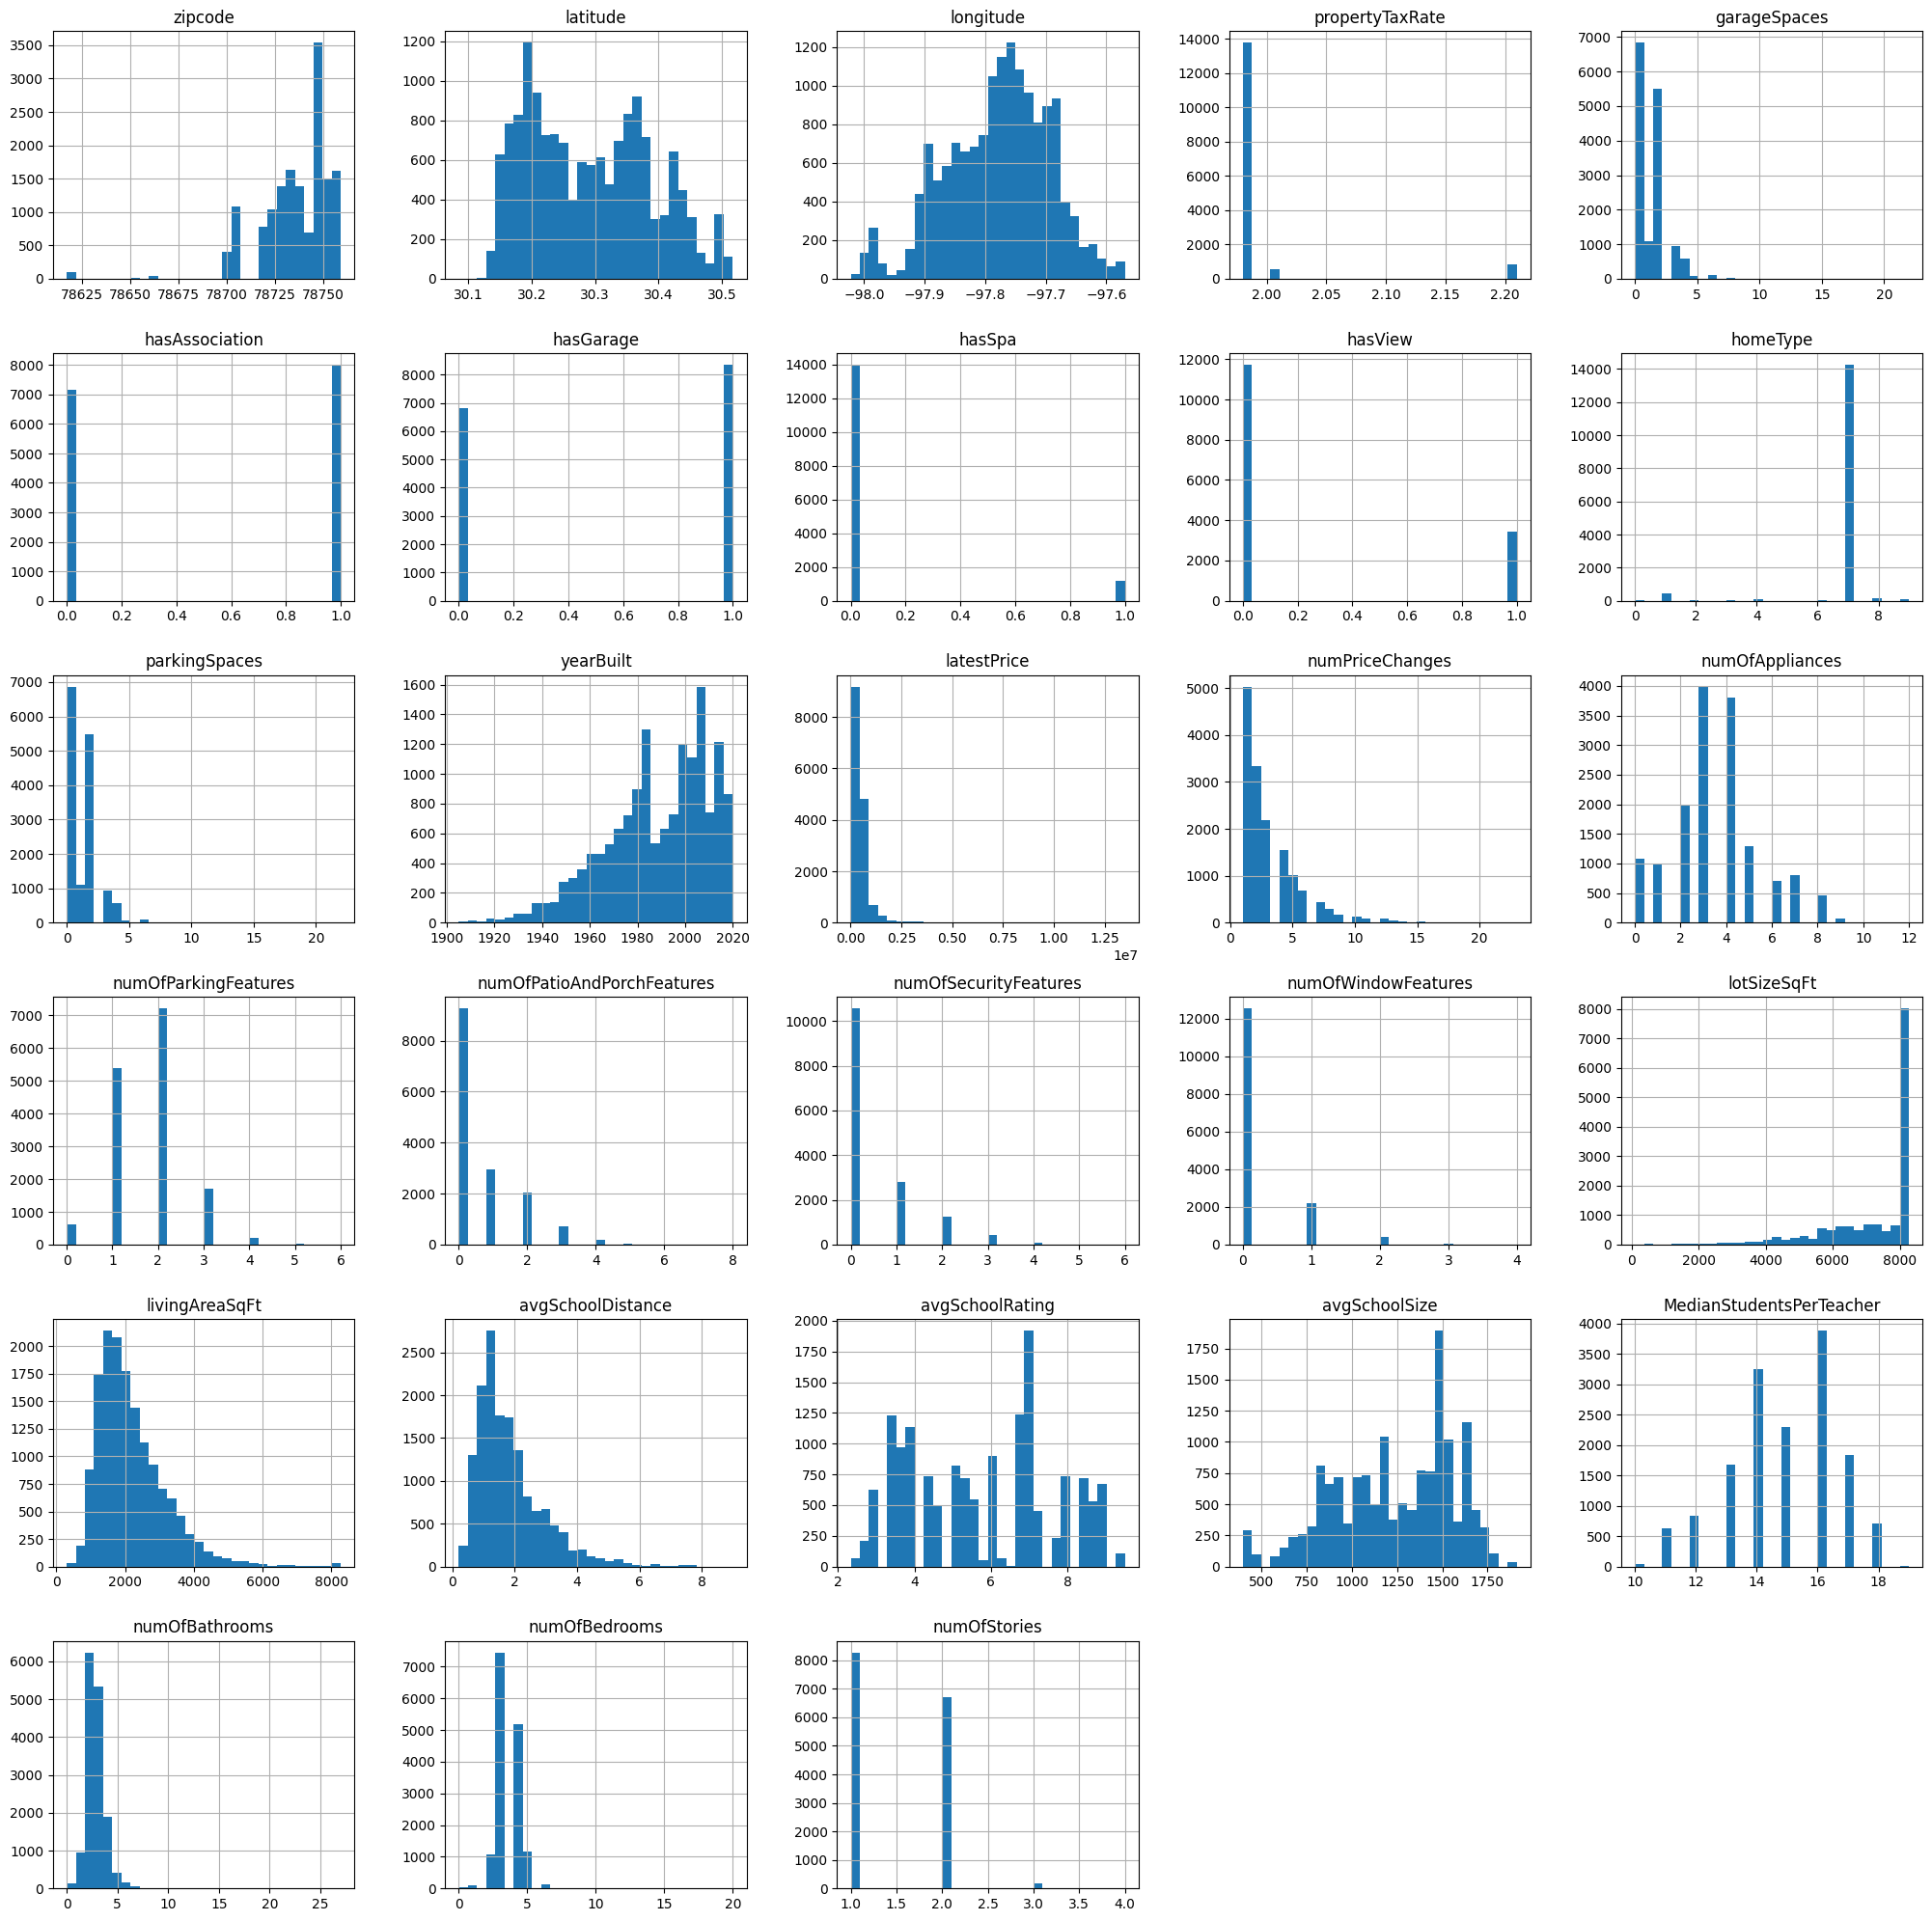

In [15]:
clean_df.hist(bins=30, figsize=(25,25))
plt.show()

### Scaling

Use standard scaling as it scales the data to unit variance. While not perfect, can yield better results than MinMax scaling as it would otherwise compress a lot of inliers into a very narrow range (digits like 0.0005 for example)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(clean_df)

i = 0
for col in clean_df.columns[:-1]:
    clean_df[col] = scaled[:,i]
    i += 1

clean_df

,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasGarage,hasSpa,hasView,homeType,...,numOfWindowFeatures,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,-4.019137,1.433803,1.362892,-0.265248,0.570097,0.945895,0.904299,-0.292941,-0.543043,0.183428,...,1.620901,-0.851823,0.399818,-0.535249,-1.673595,-0.533854,-0.492151,0.300632,0.658444,2
1,-4.019137,1.454849,1.379193,-0.265248,0.570097,0.945895,0.904299,-0.292941,-0.543043,0.183428,...,-0.426958,-0.732281,-0.422348,-0.410445,-1.673595,-0.533854,-0.492151,-0.647765,0.658444,1
2,-4.019137,1.218441,1.638033,-0.265248,-0.909113,0.945895,-1.105829,-0.292941,-0.543043,0.183428,...,-0.426958,0.404743,-0.708576,-0.597651,-1.494404,-0.396030,-0.492151,-0.647765,-0.518146,1
3,-4.019137,1.449066,1.379644,-0.265248,0.570097,0.945895,0.904299,-0.292941,-0.543043,0.183428,...,-0.426958,-0.792052,-0.511177,-0.410445,-1.673595,-0.533854,-0.492151,-0.647765,-0.518146,1
4,-4.019137,1.503275,1.436293,-0.265248,-0.909113,0.945895,-1.105829,-0.292941,-0.543043,0.183428,...,-0.426958,-0.372968,-0.063082,-0.660053,-0.956832,-0.043812,-0.492151,0.300632,-0.518146,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,0.638709,-1.336489,-0.446376,-0.265248,3.528518,-1.057200,0.904299,-0.292941,1.841474,0.183428,...,-0.426958,-0.492510,-0.949402,-0.878460,-1.315213,0.571804,-0.492151,-0.647765,-0.518146,1
15167,0.268199,-0.529784,0.067251,-0.265248,0.570097,0.945895,0.904299,3.413656,1.841474,0.183428,...,-0.426958,-3.305873,-0.303909,0.057571,0.476695,-0.034623,0.656087,1.249029,-0.518146,3
15168,-1.690214,-0.482223,0.205497,-0.265248,0.570097,-1.057200,0.904299,-0.292941,-0.543043,0.183428,...,-0.426958,0.704286,-0.663174,-0.972063,-0.419259,-1.066775,-1.066270,0.300632,-0.518146,2
15169,-0.737473,-0.103408,0.717053,-0.265248,-0.909113,-1.057200,-1.105829,-0.292941,-0.543043,-3.293970,...,-0.426958,-0.792052,3.821723,-0.504048,0.476695,-0.552230,0.081968,-0.647765,0.658444,1


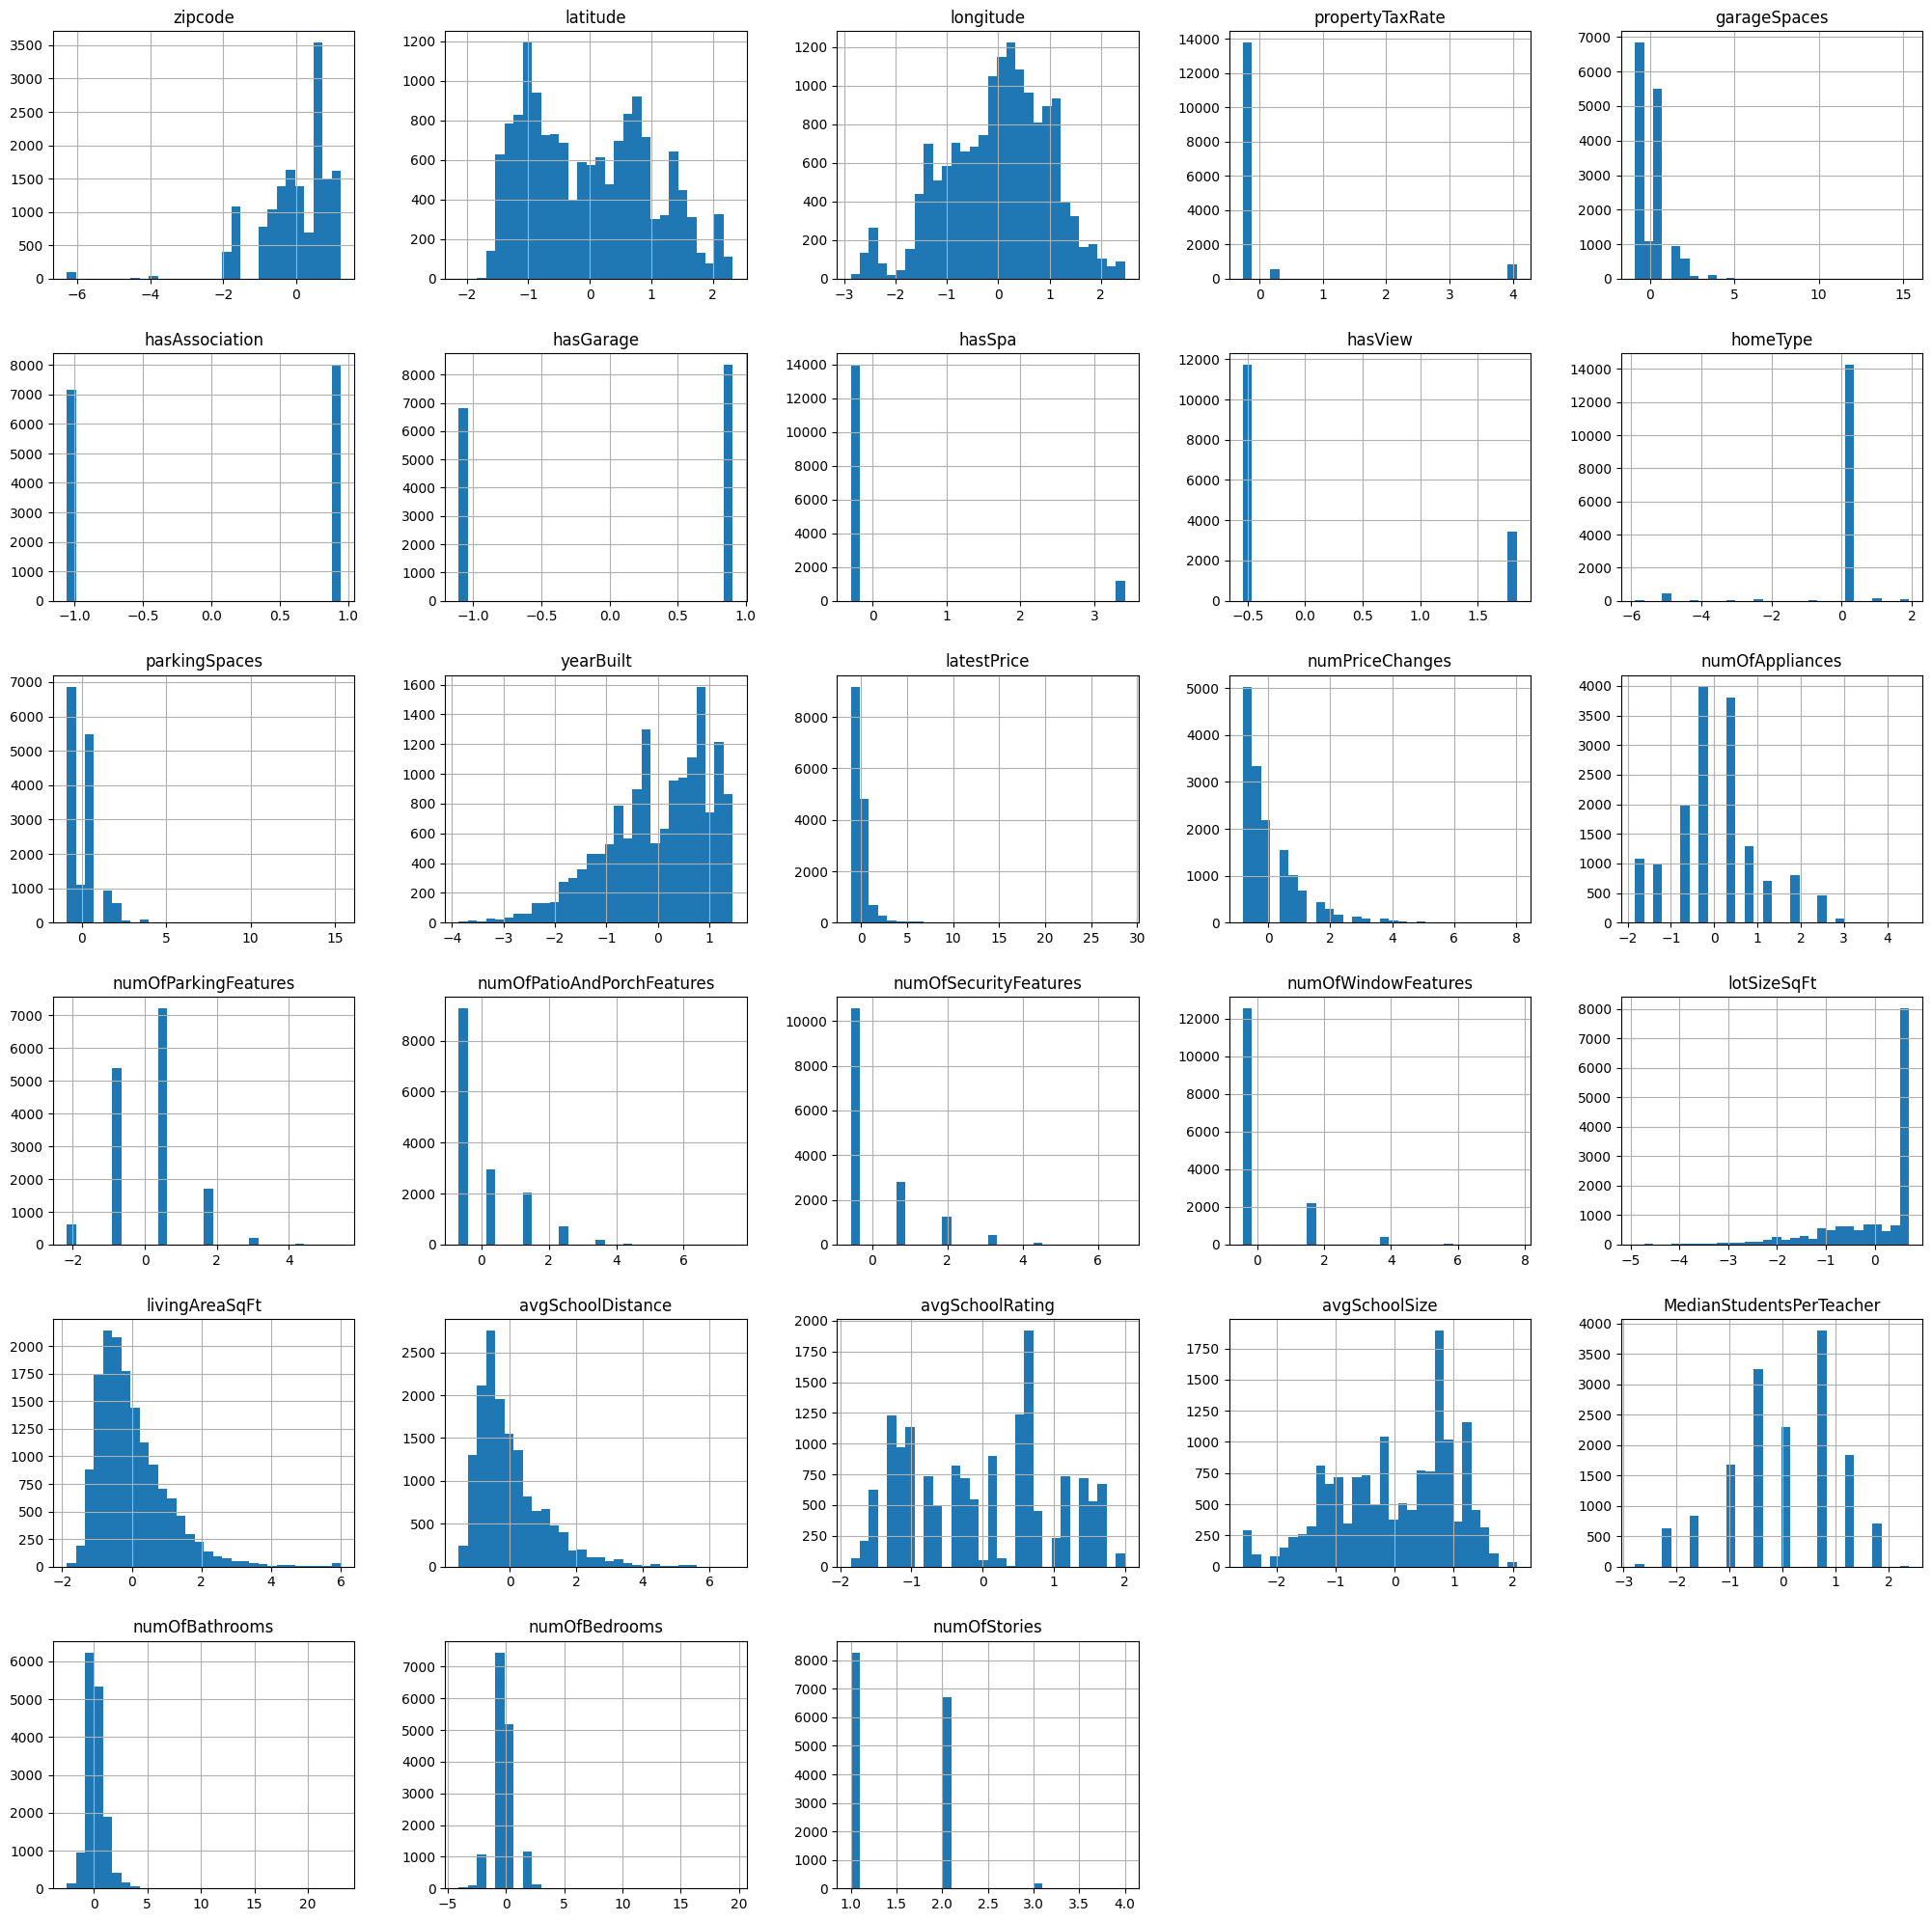

In [17]:
clean_df.hist(bins=30, figsize=(25,25))
plt.show()

In [19]:
from pathlib import Path  

filepath = Path('../datasets/austin_housing/processed_austin_housing.csv')
clean_df.to_csv(filepath, index=False)